In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

d:\Projects\NTI-CNN-Flowers-Dataset\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\lenovo\.cache\kagglehub\datasets\alxmamaev\flowers-recognition\versions\2


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [4]:
train = datagen.flow_from_directory(
    'D:/Projects/NTI-CNN-Flowers-Dataset/flowers',
    target_size=(320, 240),
    batch_size=32,
    class_mode='categorical', # change to catigorical in multiclass
    subset='training', # no need if the folders is splited into train and test
    shuffle=True
)

# Load validation images
val = datagen.flow_from_directory(
    'D:/Projects/NTI-CNN-Flowers-Dataset/flowers',
    target_size=(320, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding="same" ,input_shape=(320, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same" ,input_shape=(320, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding="same" ,input_shape=(320, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

d:\Projects\NTI-CNN-Flowers-Dataset\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 320, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 160, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 120, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 80, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 60, 1)      │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 40, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        38,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,214 (235.21 KB)

 Trainable params: 60,214 (235.21 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
histroy = model.fit(train, epochs=10, validation_data=val,verbose=1)

d:\Projects\NTI-CNN-Flowers-Dataset\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 902ms/step - accuracy: 0.2939 - loss: 1.5559

d:\Projects\NTI-CNN-Flowers-Dataset\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.3489 - loss: 1.4933 - val_accuracy: 0.4221 - val_loss: 1.3933
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 735ms/step - accuracy: 0.4128 - loss: 1.3470 - val_accuracy: 0.3953 - val_loss: 1.3027
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 742ms/step - accuracy: 0.4226 - loss: 1.2842 - val_accuracy: 0.4267 - val_loss: 1.2766
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 776ms/step - accuracy: 0.4319 - loss: 1.2810 - val_accuracy: 0.4314 - val_loss: 1.2737
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 737ms/step - accuracy: 0.4669 - loss: 1.2435 - val_accuracy: 0.4779 - val_loss: 1.2566
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 734ms/step - accuracy: 0.4900 - loss: 1.2075 - val_accuracy: 0.4895 - val_loss: 1.1651
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 739ms/step - accuracy: 0.4958 - loss: 1.1917 - val_accuracy: 0.5233 - val_loss: 1.1662
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 732ms/step - accuracy: 0.5062 - loss: 1.1759 - val_a

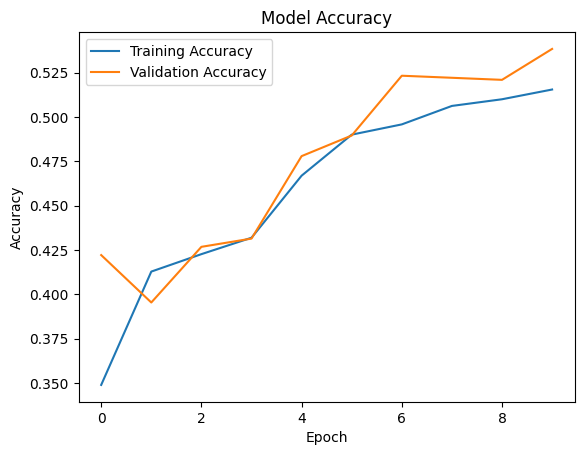

In [11]:
import matplotlib.pyplot as plt

plt.plot(histroy.history['accuracy'], label='Training Accuracy')
plt.plot(histroy.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [13]:
model.save("CNN.keras")